<a href="https://colab.research.google.com/github/HestiaM-23/Skin-Cancer-Analysis/blob/main/Skin_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Dataset Overview**

***Attributes:-***

1. lesion_id: An identifier for each skin lesion sample.
2. image_id: The unique identifier for the image associated with the lesion.
3. dx: The diagnosis label for the lesion (e.g., nv, mel, bkl, bcc, akiec, vasc, df).
4. dx_type: The method or source of diagnosis (e.g., histopathology, consensus, follow-up, etc.).
5. age: The age of the patient in years.
6. sex: The gender of the patient (male/female).
7. localization: The anatomical site of the lesion on the body (e.g., torso, lower extremity, head/neck, etc.).
8. dataset: The dataset source or partition (e.g., HAM10000, BCN_20000, etc.).

***About Dataset:-***

The ISIC2018 skin lesion dataset comprises several hundred rows and 8 columns, each representing a unique skin lesion case with associated metadata. It includes details such as lesion and image identifiers, diagnosis type, patient age and sex, anatomical localization, and dataset source.

***Key Features of the Dataset:***

1. Comprehensive Lesion Metadata: Includes both lesion and image IDs for traceability.

2. Diagnosis Labels: Covers a range of skin lesion types, including benign and malignant categories.

3. Patient Demographics: Provides age and sex for each case, enabling demographic analysis.

4. Anatomical Localization: Specifies the body site of each lesion for spatial pattern analysis.

5. Dataset Source: Indicates the origin of each sample, supporting cross-dataset studies.

6. Diagnosis Method: Captures how the diagnosis was determined, useful for reliability assessment.

This dataset is suitable for machine learning tasks such as classification, demographic analysis, and epidemiological studies of skin lesions

# **1. Data Loading & Initial Exploration**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

#**2. Load the data**

In [ ]:
data = pd.read_csv('ISIC2018_Task3_Test_GroundTruth.csv')
print(data.head())
print(data.info())
data = data.dropna()
data = data.drop(['lesion_id', 'image_id'], axis=1)

         lesion_id      image_id   dx    dx_type   age     sex localization  \
0  HAMTEST_0000000  ISIC_0034524   nv  follow_up  40.0  female         back   
1  HAMTEST_0000001  ISIC_0034525   nv      histo  70.0    male      abdomen   
2  HAMTEST_0000002  ISIC_0034526  bkl      histo  70.0    male         back   
3  HAMTEST_0000003  ISIC_0034527   nv      histo  35.0    male        trunk   
4  HAMTEST_0000004  ISIC_0034528   nv  follow_up  75.0  female        trunk   

         dataset  
0  vidir_molemax  
1      rosendahl  
2      rosendahl  
3    vienna_dias  
4  vidir_molemax  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     1512 non-null   object 
 1   image_id      1512 non-null   object 
 2   dx            1512 non-null   object 
 3   dx_type       1512 non-null   object 
 4   age           1230 non-null   float64
 5  

# **3. Exploratory Data Analysis (EDA)**

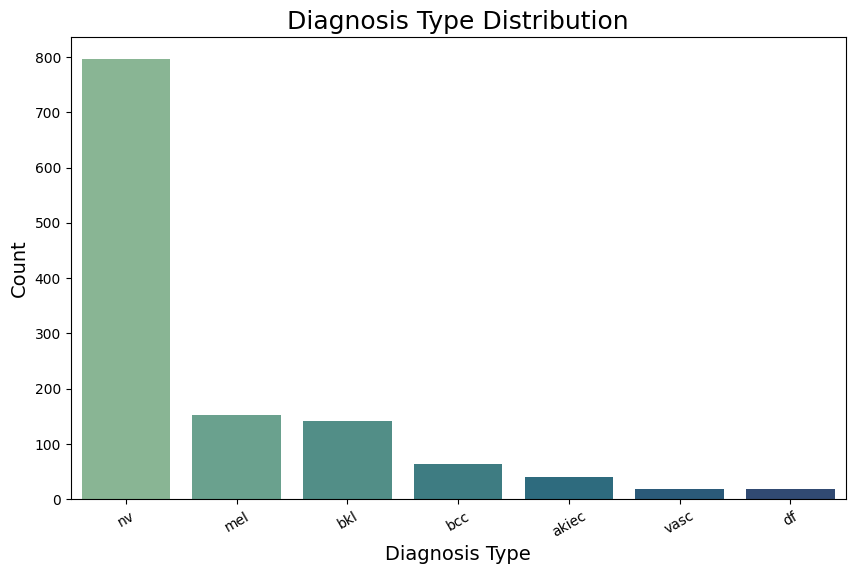

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='dx', palette='crest', order=data['dx'].value_counts().index)
plt.title('Diagnosis Type Distribution', fontsize=18)
plt.xlabel('Diagnosis Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=30)
plt.show()

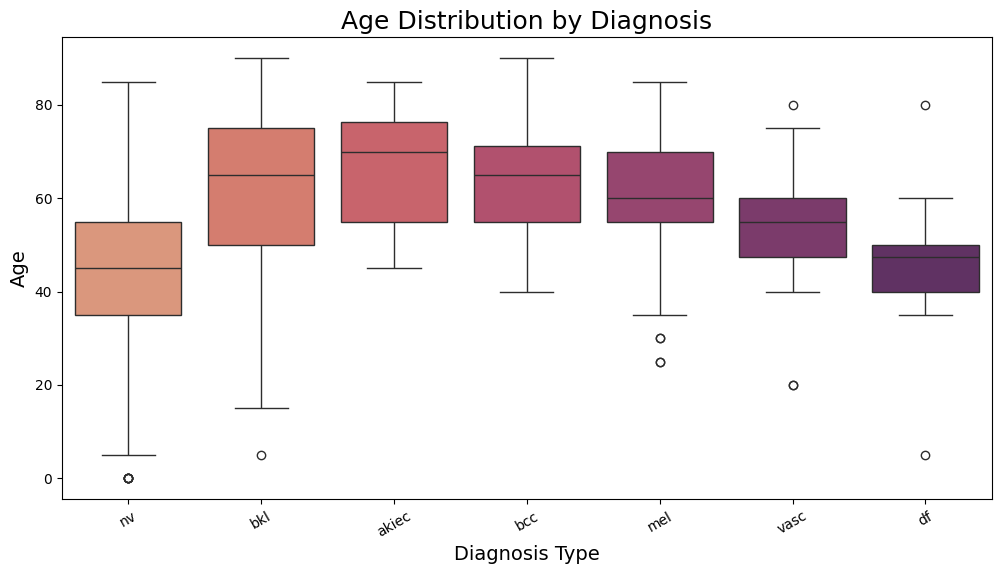

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data, x='dx', y='age', palette='flare')
plt.title('Age Distribution by Diagnosis', fontsize=18)
plt.xlabel('Diagnosis Type', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.xticks(rotation=30)
plt.show()

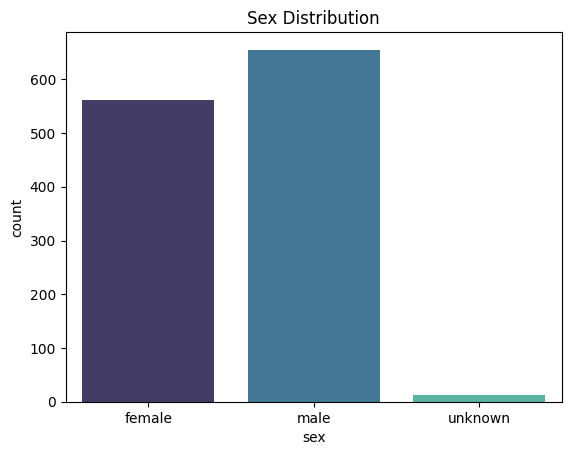

In [ ]:
sns.countplot(data=data, x='sex', palette='mako')
plt.title('Sex Distribution')
plt.show()

# **4. Data Pre-processing**

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in ['dx', 'dx_type', 'sex', 'localization', 'dataset']:
    data[col] = LabelEncoder().fit_transform(data[col])
print(data.head())

   dx  dx_type   age  sex  localization  dataset
0   5        2  40.0    0             1        3
1   5        3  70.0    1             0        1
2   2        3  70.0    1             1        1
3   5        3  35.0    1            11        4
4   5        2  75.0    0            11        3


# **5. Model Selection & Training**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Features and target
X = data.drop('dx', axis=1)
y = data['dx']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'Logistic Regression': LogisticRegression(max_iter=1000, multi_class='multinomial'),
    'SVC': SVC(probability=True)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.3f}")
    print(classification_report(y_test, y_pred))


Random Forest Accuracy: 0.724
              precision    recall  f1-score   support

           0       0.36      0.42      0.38        12
           1       0.29      0.37      0.33        19
           2       0.53      0.60      0.56        42
           3       0.00      0.00      0.00         5
           4       0.37      0.39      0.38        46
           5       0.93      0.88      0.90       239
           6       0.25      0.17      0.20         6

    accuracy                           0.72       369
   macro avg       0.39      0.40      0.39       369
weighted avg       0.74      0.72      0.73       369


XGBoost Accuracy: 0.718
              precision    recall  f1-score   support

           0       0.35      0.50      0.41        12
           1       0.22      0.26      0.24        19
           2       0.50      0.55      0.52        42
           3       0.20      0.20      0.20         5
           4       0.38      0.35      0.36        46
           5       0.9

# **6. Confusion Matrix Visualization**

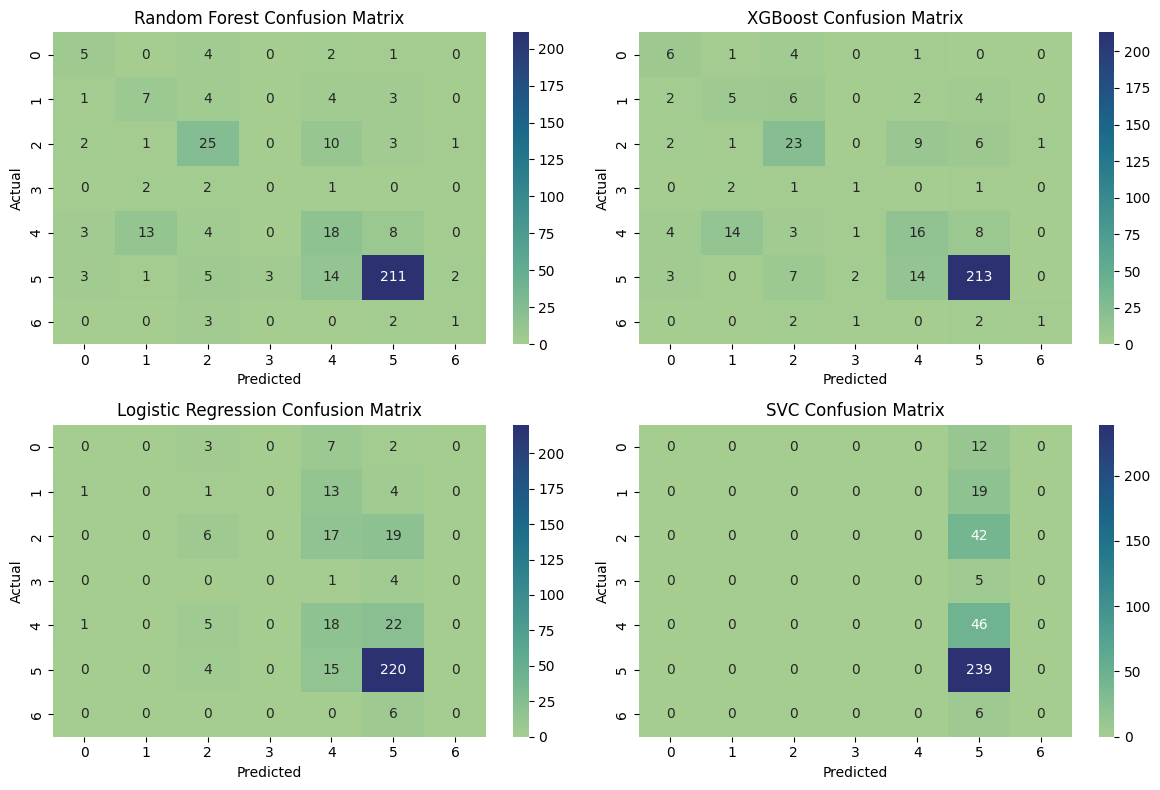

In [ ]:
plt.figure(figsize=(12,8))
for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(2,2,i)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='crest')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# **7. Feature Importance**

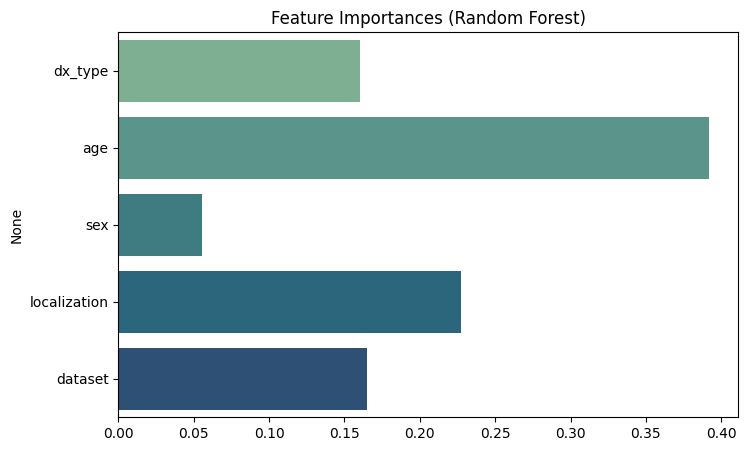

In [ ]:
rf = models['Random Forest']
importances = rf.feature_importances_
feat_names = X.columns
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=feat_names, palette='crest')
plt.title('Feature Importances (Random Forest)')
plt.show()

# **8. Model Comparison**

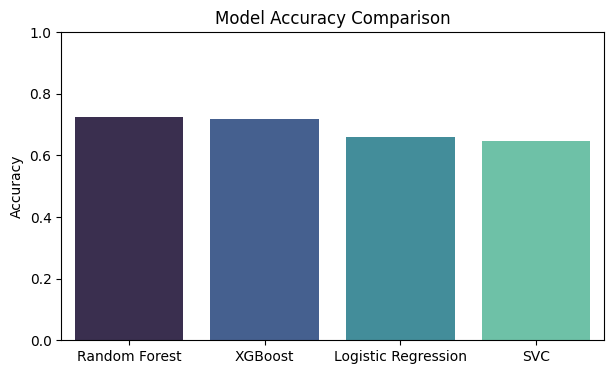

In [ ]:
plt.figure(figsize=(7,4))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='mako')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()